In [79]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('segmentation_data.csv', index_col=0)

In [8]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [9]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [12]:
corr_matr = df.corr()

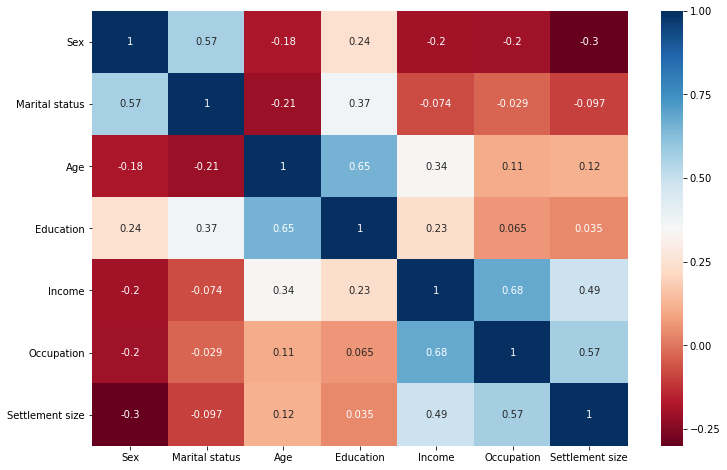

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matr, annot=True, cmap='RdBu')
plt.show()

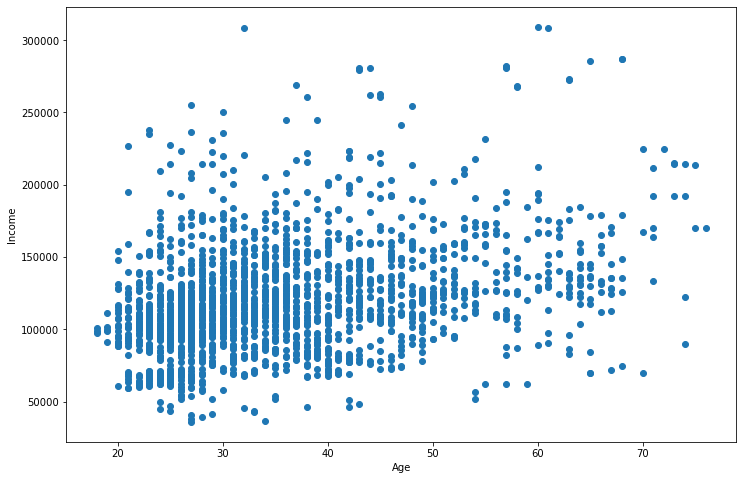

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [27]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

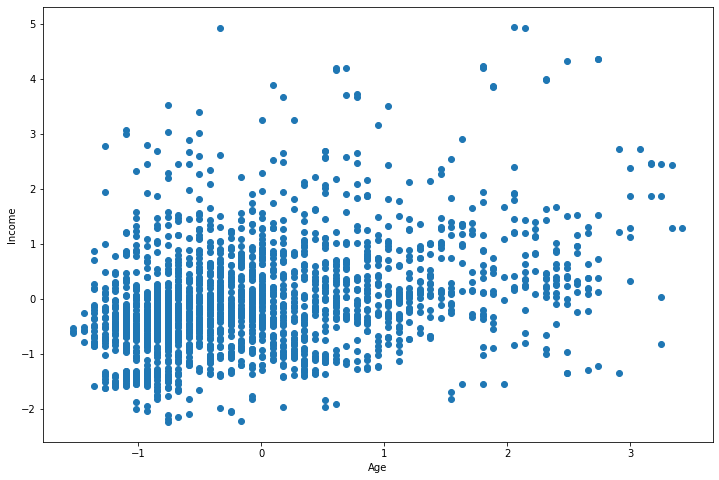

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(df_scaled.iloc[:, 2], df_scaled.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Hierarchical clustering

In [31]:
hier_clust = linkage(scaled, method='ward')

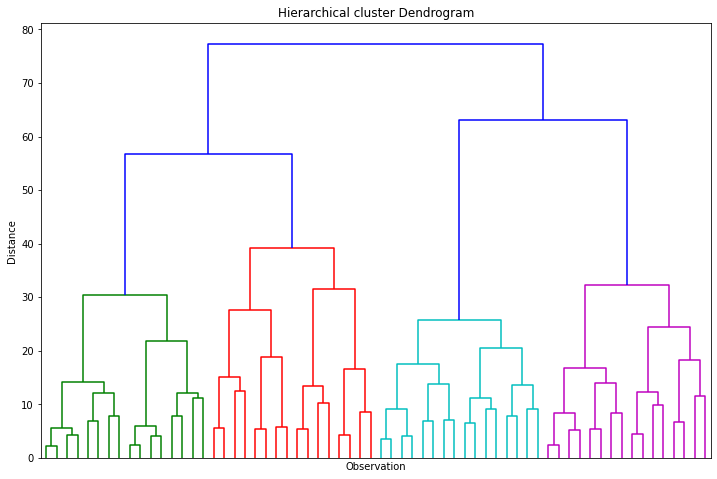

In [38]:
plt.figure(figsize=(12, 8))
plt.title('Hierarchical cluster Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           truncate_mode='level',
           p=5,
           show_leaf_counts=False,
           no_labels=True,
           # color_threshold=0
           )
plt.show()

within cluster squares summ WCSS. clusters quality metrics. 
mesures the distance between each observation and centroids and calculates the square distansce between thet 2

In [39]:
# k-means++ runs vefore actual KMeans algorithm and finds best starting points for centroids
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
    

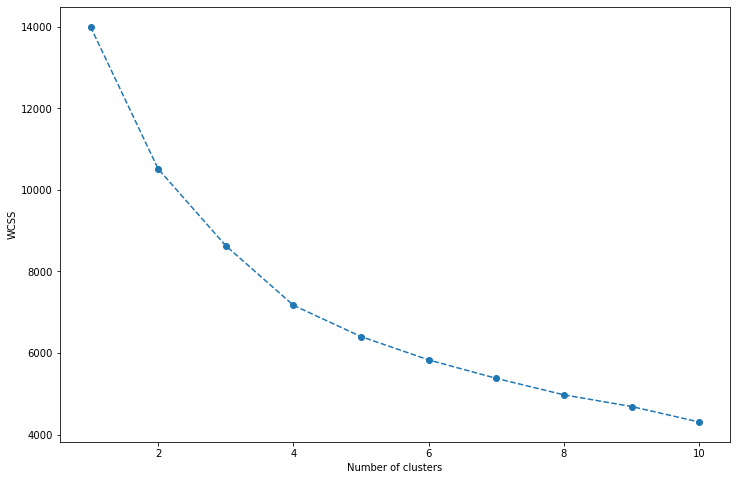

In [40]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# using elbow method to chose number of classes. 4 in this case
# hierarchical clustering gave the same result

In [44]:
kmeans = KMeans(n_clusters=4, 
                init='k-means++', 
                random_state=42)
kmeans.fit(scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [56]:
df_kmeans = df.copy()
df_kmeans['Segment_kmeans'] = kmeans.labels_
df_kmeans_analysis = df_kmeans.groupby(by=['Segment_kmeans'], as_index=False).mean()

In [70]:
df_kmeans_analysis

,Segment_kmeans,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Observations_number,Observations_proportion
0,Well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,Standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,Career-Focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [50]:
# after segment analysis. 
seg_classes = {0: 'Well-off', 
               1: 'Fewer Opportunities', 
               2: 'Standard',
               3: 'Career-Focused'}

In [63]:
df_kmeans_analysis['Observations_number'] = df_kmeans[['Segment_kmeans', 'Sex']].groupby(by=['Segment_kmeans']).count()

In [66]:
df_kmeans_analysis['Observations_proportion'] = df_kmeans_analysis['Observations_number'] / df_kmeans_analysis['Observations_number'].sum()

In [67]:
df_kmeans_analysis

,Segment_kmeans,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Observations_number,Observations_proportion
0,0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [69]:
df_kmeans_analysis['Segment_kmeans'].replace(seg_classes, inplace=True)

In [73]:
df_kmeans['Segment_kmeans'] = df_kmeans['Segment_kmeans'].map(seg_classes)

In [81]:
x_axis = df_kmeans['Age']
y_axis = df_kmeans['Income']
plt.figure(figsize=(12, 8))
sns.scatterplot(x_axis, y_axis, hue=['Segment_kmeans'], palette=['g', 'r', 'c', 'm'])
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 864x576 with 0 Axes>

In [80]:
sns.__version__

'0.8.1'